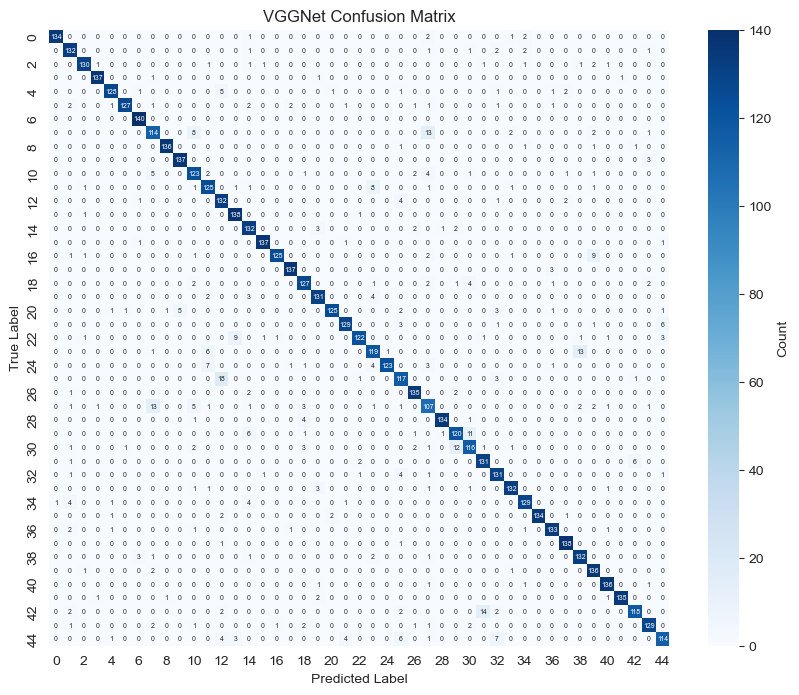

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 读取真实标签和预测结果
all_labels = []
all_preds = []
with open("./best_model_labels_preds.txt", "r") as f:
    for line in f:
        label, pred = map(int, line.strip().split())
        all_labels.append(label)
        all_preds.append(pred)

# 计算混淆矩阵
conf_matrix = confusion_matrix(all_labels, all_preds)

# 绘制混淆矩阵热力图
plt.figure(figsize=(10, 8))  # 调整图形大小
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Count'}, annot_kws={"size": 5})
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("VGGNet Confusion Matrix")

# 保存图像
plt.savefig("./VGG_Confusion_Matrix.png", dpi=500)  # 保存为高分辨率图片
plt.show()


In [2]:
import re

# 读取日志文件
with open('./VGGNet.log', 'r') as file:
    log_data = file.read()

# 提取训练指标
metrics = {
    "epoch": [],
    "training_loss": [],
    "training_accuracy": [],
    "validating_loss": [],
    "validating_accuracy": [],
    "precision": [],
    "recall": [],
    "f1_score": [],
    "auc": []
}

# 使用正则表达式提取数据
for line in log_data.splitlines():
    match = re.search(
        r'Epoch: (\d+), Training loss: ([\d.]+), Training accuracy: ([\d.]+), Validating loss: ([\d.]+), Validating accuracy: ([\d.]+), Precision: ([\d.]+), Recall: ([\d.]+), f1 score: ([\d.]+), auc: ([\d.]+)',
        line)
    if match:
        metrics["epoch"].append(int(match.group(1)))
        metrics["training_loss"].append(float(match.group(2)))
        metrics["training_accuracy"].append(float(match.group(3)))
        metrics["validating_loss"].append(float(match.group(4)))
        metrics["validating_accuracy"].append(float(match.group(5)))
        metrics["precision"].append(float(match.group(6)))
        metrics["recall"].append(float(match.group(7)))
        metrics["f1_score"].append(float(match.group(8)))
        metrics["auc"].append(float(match.group(9)))


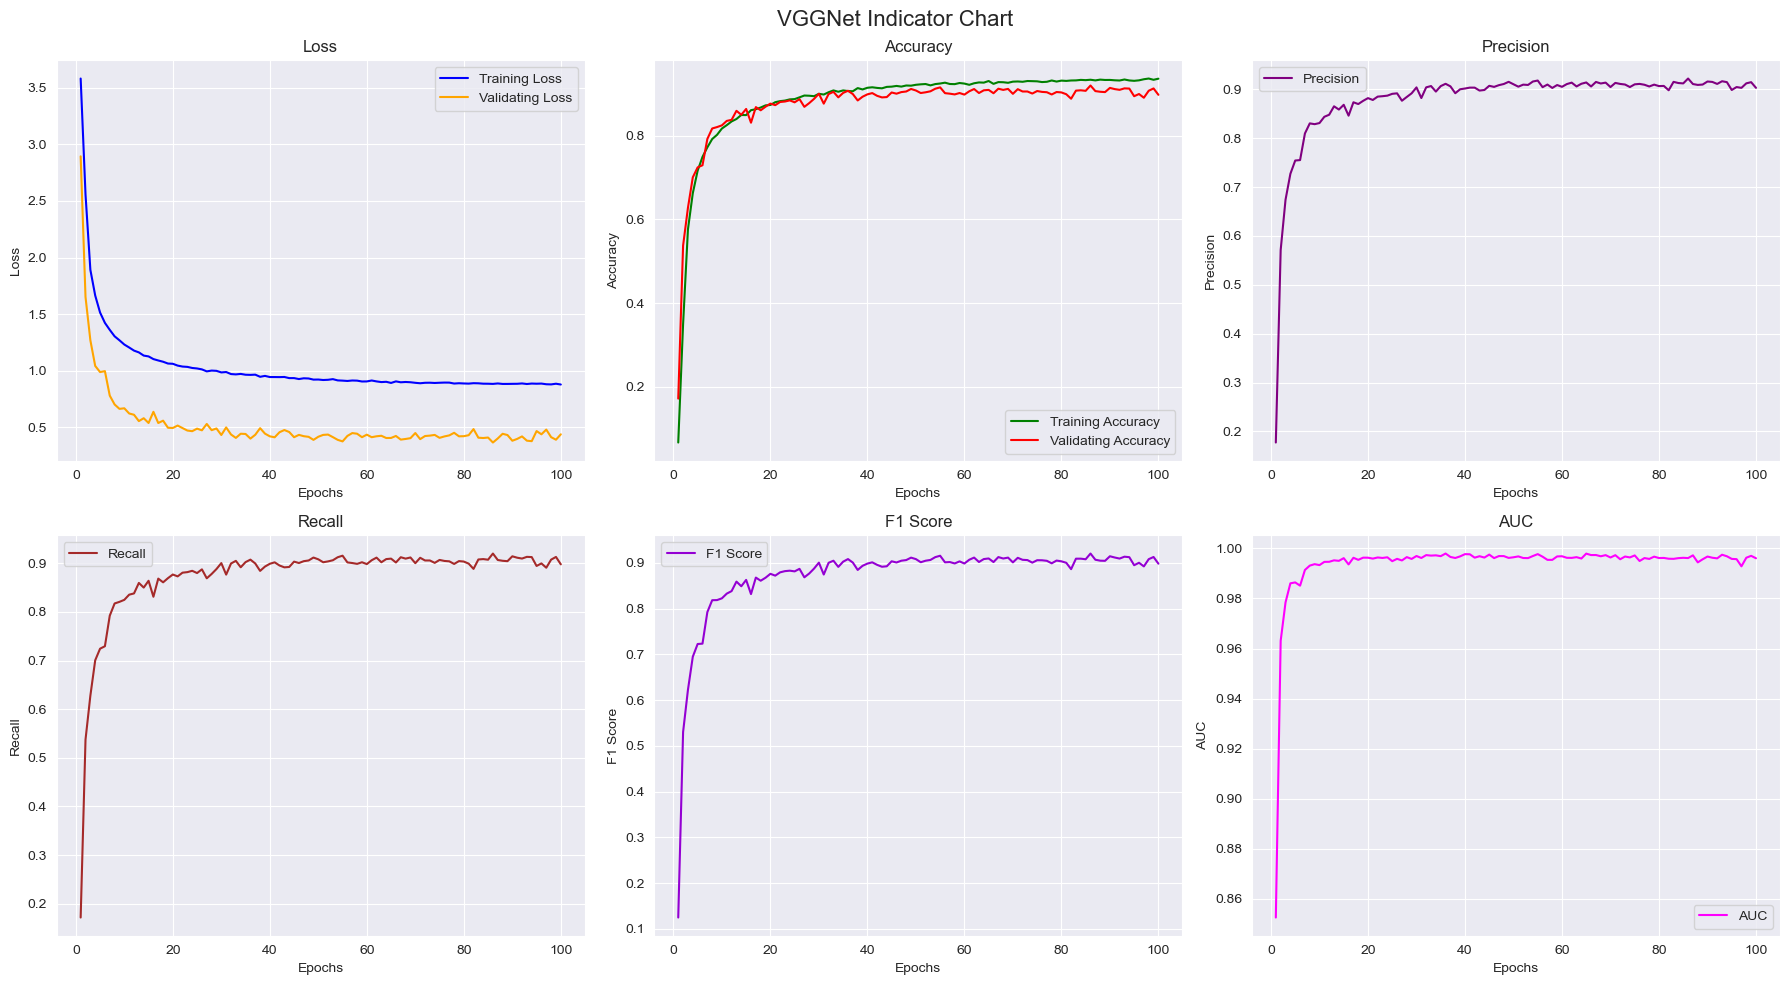

In [3]:
import matplotlib.pyplot as plt

epochs = metrics["epoch"]

# 创建一个包含 6 个子图的图形（2 行 3 列）
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('VGGNet Indicator Chart', fontsize=16)

# 1. 损失变化图
axs[0, 0].plot(epochs, metrics["training_loss"], label='Training Loss', color='blue')
axs[0, 0].plot(epochs, metrics["validating_loss"], label='Validating Loss', color='orange')
axs[0, 0].set_title('Loss')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Loss')
axs[0, 0].legend()

# 2. 准确率变化图
axs[0, 1].plot(epochs, metrics["training_accuracy"], label='Training Accuracy', color='green')
axs[0, 1].plot(epochs, metrics["validating_accuracy"], label='Validating Accuracy', color='red')
axs[0, 1].set_title('Accuracy')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

# 3. 精确率变化图
axs[0, 2].plot(epochs, metrics["precision"], label='Precision', color='purple')
axs[0, 2].set_title('Precision')
axs[0, 2].set_xlabel('Epochs')
axs[0, 2].set_ylabel('Precision')
axs[0, 2].legend()

# 4. 召回率变化图
axs[1, 0].plot(epochs, metrics["recall"], label='Recall', color='brown')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# 5. F1分数变化图
axs[1, 1].plot(epochs, metrics["f1_score"], label='F1 Score', color='darkviolet')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('F1 Score')
axs[1, 1].legend()

# 6. AUC变化图
axs[1, 2].plot(epochs, metrics["auc"], label='AUC', color='magenta')
axs[1, 2].set_title('AUC')
axs[1, 2].set_xlabel('Epochs')
axs[1, 2].set_ylabel('AUC')
axs[1, 2].legend()

# 调整子图之间的间距
plt.tight_layout()

# 保存图形
plt.savefig('VGGNet-Indicator-Chart.png', dpi=1000)

# 显示图形
plt.show()
